In [33]:
# Importing required libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'bike_dataset.csv'  
bike_data = pd.read_csv(file_path)



In [34]:
# Step 1: Deciding (not) to Segment
# Segmentation is appropriate because the dataset contains diverse features such as price, CC, mileage, etc.

# Step 2: Specifying the Ideal Target Segment
# Let's assume we are looking for segments based on bike performance, affordability, and type.

# Step 3: Collecting Data
# The dataset is already provided.



In [35]:
# Step 4: Exploring Data
# Displaying basic statistics and checking for missing values
print("Dataset Overview:\n", bike_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361 entries, 0 to 360
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   model_name          361 non-null    object 
 1   price               361 non-null    int64  
 2   CC                  304 non-null    float64
 3   mileage             361 non-null    float64
 4   type_of_bike        361 non-null    object 
 5   weight_in_kg        361 non-null    int64  
 6   links               361 non-null    object 
 7   acceleration_speed  170 non-null    float64
 8   top_speed           200 non-null    float64
dtypes: float64(4), int64(2), object(3)
memory usage: 25.5+ KB
Dataset Overview:
 None


In [36]:
print("\nStatistical Summary:\n", bike_data.describe())


Statistical Summary:
               price           CC     mileage  weight_in_kg  \
count  3.610000e+02   304.000000  361.000000    361.000000   
mean   8.399079e+05   680.973684   44.681413    178.839335   
std    1.052083e+06   547.744364   39.890270     73.839516   
min    3.800000e+04    87.800000    8.000000     55.000000   
25%    1.000000e+05   164.425000   20.000000    118.000000   
50%    2.420000e+05   618.000000   30.000000    169.000000   
75%    1.459000e+06  1051.500000   55.000000    216.000000   
max    7.990000e+06  2458.000000  320.000000    433.000000   

       acceleration_speed   top_speed  
count          170.000000  200.000000  
mean             4.193412   99.338650  
std              2.369334   39.631992  
min              1.010000   25.000000  
25%              2.800000   79.500000  
50%              3.215000  100.000000  
75%              5.075000  129.115000  
max             13.800000  200.000000  


In [37]:
print("\nMissing Values:\n", bike_data.isnull().sum())


Missing Values:
 model_name              0
price                   0
CC                     57
mileage                 0
type_of_bike            0
weight_in_kg            0
links                   0
acceleration_speed    191
top_speed             161
dtype: int64


In [38]:
# Handling missing values by filling them with the mean
bike_data['CC'] = bike_data['CC'].fillna(bike_data['CC'].mean())
bike_data['acceleration_speed'] = bike_data['acceleration_speed'].fillna(bike_data['acceleration_speed'].mean())
bike_data['top_speed'] = bike_data['top_speed'].fillna(bike_data['top_speed'].mean())

#Verify missing values are handled
print("\nMissing Values After Handling:\n", bike_data.isnull().sum())


Missing Values After Handling:
 model_name            0
price                 0
CC                    0
mileage               0
type_of_bike          0
weight_in_kg          0
links                 0
acceleration_speed    0
top_speed             0
dtype: int64


In [39]:
# Step 5: Extracting Segments
# Selecting relevant numeric features
features = ['price', 'CC', 'mileage', 'weight_in_kg', 'acceleration_speed', 'top_speed']

# Standardizing the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(bike_data[features])

# Applying K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
bike_data['Segment'] = kmeans.fit_predict(scaled_features)



C:\Users\sumit\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sumit\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [40]:
# Step 6: Profiling Segments
# Analyzing segment characteristics
segment_profiles = bike_data.groupby('Segment')[features].mean()
print("\nSegment Profiles:\n", segment_profiles)




Segment Profiles:
                 price           CC    mileage  weight_in_kg  \
Segment                                                       
0        2.222504e+05   261.041667  38.007130    157.398148   
1        2.904260e+06  1747.747059  15.817647    338.558824   
2        8.550233e+04   431.470588  91.101961    103.588235   
3        1.467843e+06   976.116239  18.760855    217.820513   

         acceleration_speed   top_speed  
Segment                                  
0                  2.907046  127.854412  
1                  4.193412   99.338650  
2                  5.555446   69.145490  
3                  4.193412   99.338650  


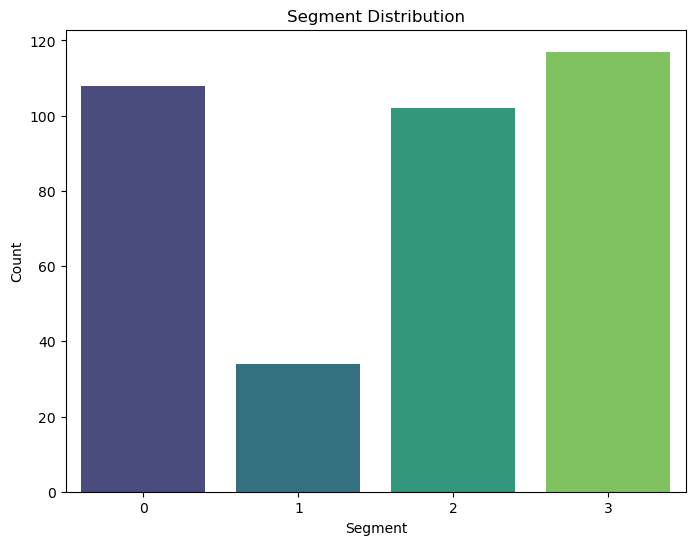

In [41]:
# Step 7: Describing Segments
# Visualizing segment distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Segment', data=bike_data, palette='viridis')
plt.title("Segment Distribution")
plt.xlabel("Segment")
plt.ylabel("Count")
plt.show()



In [42]:
# Step 8: Selecting the Target Segment(s)
target_segment = segment_profiles.sort_values(by=['price', 'mileage'], ascending=[True, False]).head(1)
print("\nTarget Segment Recommendation:\n", target_segment)




Target Segment Recommendation:
                 price          CC    mileage  weight_in_kg  \
Segment                                                      
2        85502.333333  431.470588  91.101961    103.588235   

         acceleration_speed  top_speed  
Segment                                 
2                  5.555446   69.14549  


In [43]:
# Step 10: Evaluation and Monitoring
# Monitoring clusters with new data and ensuring consistency.
from sklearn.metrics import silhouette_score
score = silhouette_score(scaled_features, bike_data['Segment'])
print("\nSilhouette Score:", score)



Silhouette Score: 0.422293136856618


In [44]:
# Analyzing segment characteristics
segment_profiles = bike_data.groupby('Segment')[features].mean()
print("\nSegment Profiles:\n", segment_profiles)



Segment Profiles:
                 price           CC    mileage  weight_in_kg  \
Segment                                                       
0        2.222504e+05   261.041667  38.007130    157.398148   
1        2.904260e+06  1747.747059  15.817647    338.558824   
2        8.550233e+04   431.470588  91.101961    103.588235   
3        1.467843e+06   976.116239  18.760855    217.820513   

         acceleration_speed   top_speed  
Segment                                  
0                  2.907046  127.854412  
1                  4.193412   99.338650  
2                  5.555446   69.145490  
3                  4.193412   99.338650  


In [45]:
# Selecting target segment based on affordability and mileage
target_segment = segment_profiles.sort_values(by=['price', 'mileage'], ascending=[True, False]).head(1)
print("\nTarget Segment Recommendation:\n", target_segment)



Target Segment Recommendation:
                 price          CC    mileage  weight_in_kg  \
Segment                                                      
2        85502.333333  431.470588  91.101961    103.588235   

         acceleration_speed  top_speed  
Segment                                 
2                  5.555446   69.14549  


In [46]:
# Radar Chart
def plot_radar_chart(cluster_centers):
    categories = cluster_centers.columns
    num_segments = len(cluster_centers)
    angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
    angles += angles[:1]  # Complete the circle for plotting

    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    for i in range(num_segments):
        values = cluster_centers.iloc[i].values.flatten().tolist()
        values += values[:1]  # Close the loop for the plot
        ax.plot(angles, values, label=f"Segment {i}")
        ax.fill(angles, values, alpha=0.25)

    # Use the original angles for setting the feature labels
    ax.set_thetagrids(np.degrees(angles[:-1]), categories)
    ax.set_title("Radar Chart of Cluster Centers", size=15)
    ax.legend(loc="upper right", bbox_to_anchor=(1.3, 1))
    plt.show()

plot_radar_chart(cluster_centers)


NameError: name 'cluster_centers' is not defined

In [47]:
# Market Segmentation Analysis: Insights and Recommendations

# Overview:
# The market segmentation analysis was conducted using clustering techniques to group motorcycles 
# into distinct categories based on key attributes such as price, engine displacement (CC), mileage, 
# weight, acceleration speed, and top speed. This analysis aims to identify actionable insights to 
# guide marketing and product strategies.

# Segment Profiles:
# Segment 0: Urban Performance Bikes
# - Price: ₹222,250 (affordable)
# - CC: 261 cc (low engine displacement)
# - Mileage: 38.01 km/l (moderate fuel efficiency)
# - Weight: 157.4 kg (lightweight)
# - Acceleration Speed: 2.91 seconds (fastest)
# - Top Speed: 127.85 km/h (highest speed)
# - Customer Profile: Urban commuters seeking affordable bikes with high speed and acceleration.
# - Marketing Strategy: Highlight affordability and superior speed in urban environments.

# Segment 1: Premium Cruiser Bikes
# - Price: ₹2,904,260 (luxury)
# - CC: 1747 cc (high engine displacement)
# - Mileage: 15.82 km/l (low fuel efficiency)
# - Weight: 338.6 kg (heaviest)
# - Acceleration Speed: 4.19 seconds
# - Top Speed: 99.34 km/h
# - Customer Profile: Premium customers who value power and luxury.
# - Marketing Strategy: Position these bikes as aspirational lifestyle products, targeting affluent buyers.

# Segment 2: Budget-Friendly Commuter Bikes (Recommended Target Segment)
# - Price: ₹85,502 (most affordable)
# - CC: 431 cc (moderate engine displacement)
# - Mileage: 91.10 km/l (highest fuel efficiency)
# - Weight: 103.6 kg (lightest bikes)
# - Acceleration Speed: 5.56 seconds (slower acceleration)
# - Top Speed: 69.15 km/h (lowest speed)
# - Customer Profile: Budget-conscious buyers, daily commuters, and first-time bike owners.
# - Marketing Strategy: Promote as the most economical and environmentally friendly option.
#   Target students, entry-level professionals, and urban dwellers.

# Segment 3: Mid-Range Balanced Bikes
# - Price: ₹1,467,843 (mid-range to premium)
# - CC: 976 cc (medium engine displacement)
# - Mileage: 18.76 km/l (moderate fuel efficiency)
# - Weight: 217.8 kg
# - Acceleration Speed: 4.19 seconds
# - Top Speed: 99.34 km/h
# - Customer Profile: Riders seeking a balance between performance and cost.
# - Marketing Strategy: Emphasize versatility and performance for regular use.

# Silhouette Score:
# - Value: 0.422
# - Interpretation:
#   - Moderate clustering quality.
#   - The clusters are reasonably well-separated but could benefit from further refinement, 
#     such as exploring alternative clustering methods or adjusting feature scaling.


# Conclusion:
# This segmentation analysis identifies Segment 2 as the most promising target due to its affordability 
# and high mileage, which are crucial for budget-conscious and environmentally aware customers. Strategic 
# marketing efforts focusing on these aspects will likely yield the best results. Meanwhile, other segments 
# provide opportunities for premium and performance-oriented markets.


In [48]:

# Load dataset 2
file_path = 'Cars_India_dataset.csv'  
data = pd.read_csv(file_path)



In [49]:
# Step 4: Exploring Data
print("Dataset Head:\n", data.head())




Dataset Head:
    Unnamed: 0      Model       Maker           Type  Seats  Displacement  \
0          24       GT-R      Nissan     Sports Car      2        3799.0   
1          40  Scorpio-N    Mahindra            SUV      6        2000.0   
2           2     Virtus  Volkswagen          Sedan      5        1498.0   
3           9      Amaze       Honda  Compact Sedan      5        1199.0   
4           8      Amaze       Honda  Compact Sedan      5        1199.0   

   Length  Width  Height  Wheelbase  ...  Rear Brake Drive Turning Radius  \
0    4710   1895    1370       2780  ...        Disc  4 WD           5.57   
1    4662   1917    1857       2750  ...        Disc   2WD            NaN   
2    4561   1752    1507       2651  ...        Drum   2WD           5.05   
3    3995   1695    1501       2470  ...        Drum   2WD           4.70   
4    3995   1695    1501       2470  ...        Drum   2WD           4.70   

  Fuel Tank Capacity Boot Space Fuel Efficiency Emission Type   T

In [50]:
print("\nDataset Info:\n")
print(data.info())


Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          156 non-null    int64  
 1   Model               156 non-null    object 
 2   Maker               156 non-null    object 
 3   Type                156 non-null    object 
 4   Seats               156 non-null    int64  
 5   Displacement        155 non-null    float64
 6   Length              156 non-null    int64  
 7   Width               156 non-null    int64  
 8   Height              156 non-null    int64  
 9   Wheelbase           156 non-null    int64  
 10  No_of_Cylinders     155 non-null    float64
 11  Fuel                156 non-null    object 
 12  Engine Type         156 non-null    object 
 13  Transmission        155 non-null    object 
 14  Front Brake         156 non-null    object 
 15  Rear Brake          156 non-null    objec

In [51]:
print("\nSummary Statistics:\n", data.describe(include='all'))


Summary Statistics:
         Unnamed: 0      Model    Maker Type       Seats  Displacement  \
count   156.000000        156      156  156  156.000000    155.000000   
unique         NaN         45       10    9         NaN           NaN   
top            NaN  Scorpio-N  Hyundai  SUV         NaN           NaN   
freq           NaN         10       42   71         NaN           NaN   
mean     77.500000        NaN      NaN  NaN    5.538462   1598.109677   
std      45.177428        NaN      NaN  NaN    1.018440    504.656969   
min       0.000000        NaN      NaN  NaN    2.000000    799.000000   
25%      38.750000        NaN      NaN  NaN    5.000000   1197.000000   
50%      77.500000        NaN      NaN  NaN    5.000000   1493.000000   
75%     116.250000        NaN      NaN  NaN    6.000000   1999.000000   
max     155.000000        NaN      NaN  NaN    9.000000   3799.000000   

             Length        Width       Height    Wheelbase  ...  Rear Brake  \
count    156.000000   

In [52]:
# Cleaning the dataset
data = data.drop(columns=['Unnamed: 0'], errors='ignore')  # Drop irrelevant columns
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].median())  # Fill missing numericals
categorical_cols = data.select_dtypes(include=['object']).columns
data[categorical_cols] = data[categorical_cols].fillna('Unknown')  # Fill missing categoricals

In [57]:
# Step 5: Extracting Segments
# Select features for clustering

import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
features = ['Seats', 'Displacement', 'Fuel Efficiency', 'Boot Space', 'NCAP Rating', 'Type', 'Fuel']

X = data[features]

# Encoding categorical and scale numerical features
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), ['Seats', 'Displacement', 'Fuel Efficiency', 'Boot Space']),
    ('cat', OneHotEncoder(), ['Type', 'Fuel', 'NCAP Rating'])
])

# Clustering with KMeans
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('kmeans', KMeans(n_clusters=4, random_state=42))  # Adjust clusters as needed
])

# Fit and predict segments
data['Segment'] = pipeline.fit_predict(X)
print("Segment Counts:\n", data['Segment'].value_counts())



C:\Users\sumit\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Segment Counts:
 0    66
3    43
1    30
2    17
Name: Segment, dtype: int64


In [58]:
# Step 6: Profiling Segments
# Analyze each segment's characteristics
profiled_segments = data.groupby('Segment').mean()
print("\nSegment Profiles:\n", profiled_segments)




Segment Profiles:
             Seats  Displacement       Length        Width       Height  \
Segment                                                                  
0        5.060606   1193.439394  4038.303030  1739.954545  1558.742424   
1        7.033333   2243.566667  4734.400000  1893.233333  1822.166667   
2        6.529412   1579.588235  4523.823529  1799.176471  1696.352941   
3        4.837209   1773.790698  4398.837209  1829.302326  1664.930233   

           Wheelbase  No_of_Cylinders  Turning Radius  Fuel Tank Capacity  \
Segment                                                                     
0        2532.939394         3.666667        5.067273           40.181818   
1        2773.800000         4.000000        5.513333           63.200000   
2        2769.411765         4.000000        5.202941           47.352941   
3        2635.720930         4.046512        5.333953           52.313953   

         Boot Space  Fuel Efficiency  Variants  
Segment                

C:\Temps\ipykernel_23680\1331460293.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  profiled_segments = data.groupby('Segment').mean()


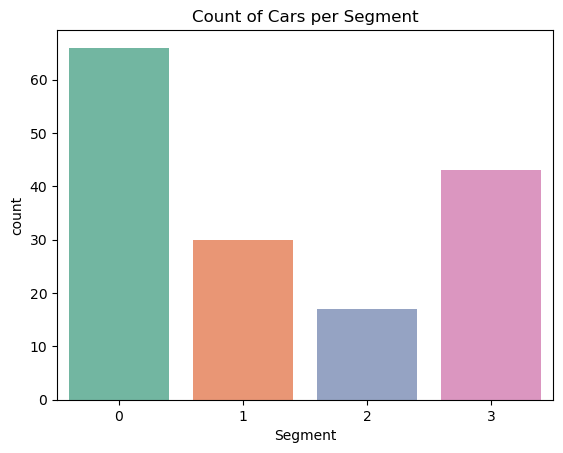

In [59]:
# Step 7: Describing Segments
# Visualization of segments
sns.countplot(data=data, x='Segment', palette='Set2')
plt.title("Count of Cars per Segment")
plt.show()



In [60]:
# Step 8: Selecting the Target Segment(s)

target_segment = profiled_segments[profiled_segments['Fuel Efficiency'] > 20]
print("\nTarget Segment Characteristics:\n", target_segment)


Target Segment Characteristics:
             Seats  Displacement      Length        Width       Height  \
Segment                                                                 
0        5.060606   1193.439394  4038.30303  1739.954545  1558.742424   

           Wheelbase  No_of_Cylinders  Turning Radius  Fuel Tank Capacity  \
Segment                                                                     
0        2532.939394         3.666667        5.067273           40.181818   

         Boot Space  Fuel Efficiency  Variants  
Segment                                         
0             370.5           20.055  2.787879  


In [61]:
data['Segment'].value_counts()

0    66
3    43
1    30
2    17
Name: Segment, dtype: int64

In [62]:
data.groupby('Segment').mean()

C:\Temps\ipykernel_23680\3565265625.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('Segment').mean()


,Seats,Displacement,Length,Width,Height,Wheelbase,No_of_Cylinders,Turning Radius,Fuel Tank Capacity,Boot Space,Fuel Efficiency,Variants
Segment,,,,,,,,,,,,
0,5.060606,1193.439394,4038.303030,1739.954545,1558.742424,2532.939394,3.666667,5.067273,40.181818,370.500000,20.055000,2.787879
1,7.033333,2243.566667,4734.400000,1893.233333,1822.166667,2773.800000,4.000000,5.513333,63.200000,411.200000,15.959000,3.166667
2,6.529412,1579.588235,4523.823529,1799.176471,1696.352941,2769.411765,4.000000,5.202941,47.352941,197.529412,17.264706,2.705882
3,4.837209,1773.790698,4398.837209,1829.302326,1664.930233,2635.720930,4.046512,5.333953,52.313953,441.511628,16.703488,2.860465


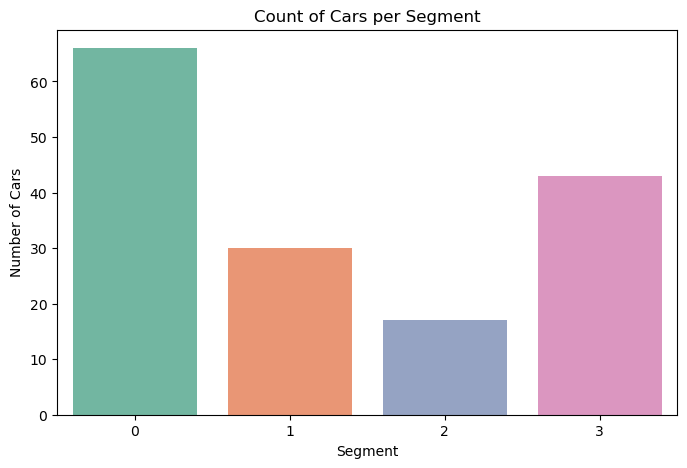

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot 1: Count of Cars per Segment
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='Segment', palette='Set2')
plt.title("Count of Cars per Segment")
plt.xlabel("Segment")
plt.ylabel("Number of Cars")
plt.show()



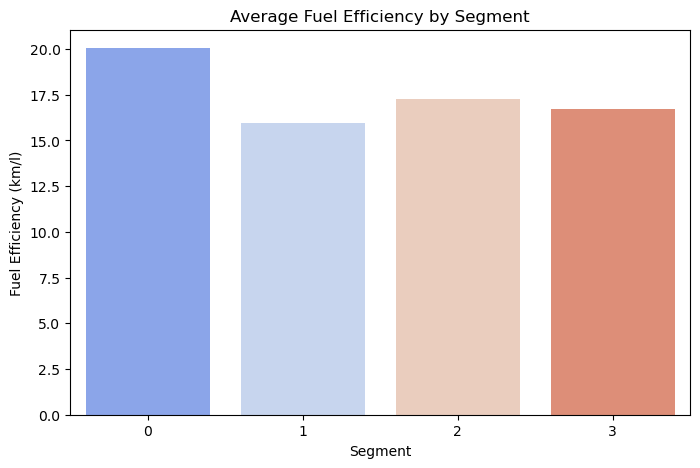

In [64]:
# Plot 2: Average Fuel Efficiency by Segment
plt.figure(figsize=(8, 5))
avg_fuel_efficiency = data.groupby('Segment')['Fuel Efficiency'].mean()
sns.barplot(x=avg_fuel_efficiency.index, y=avg_fuel_efficiency.values, palette='coolwarm')
plt.title("Average Fuel Efficiency by Segment")
plt.xlabel("Segment")
plt.ylabel("Fuel Efficiency (km/l)")
plt.show()



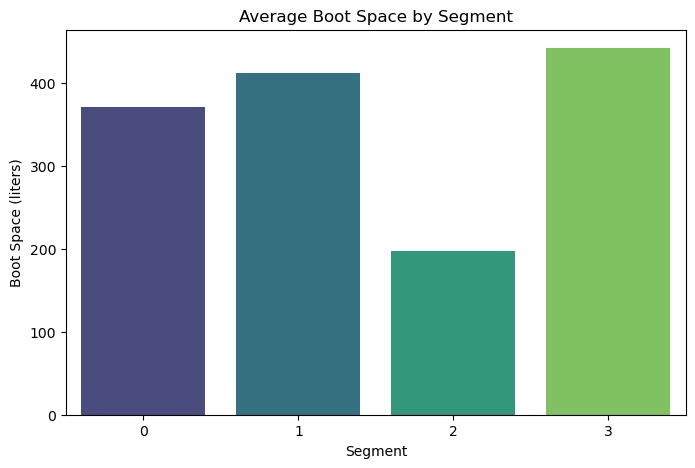

In [65]:
# Plot 3: Average Boot Space by Segment
plt.figure(figsize=(8, 5))
avg_boot_space = data.groupby('Segment')['Boot Space'].mean()
sns.barplot(x=avg_boot_space.index, y=avg_boot_space.values, palette='viridis')
plt.title("Average Boot Space by Segment")
plt.xlabel("Segment")
plt.ylabel("Boot Space (liters)")
plt.show()



In [66]:
profiled_segments[profiled_segments['Fuel Efficiency'] > 20]

,Seats,Displacement,Length,Width,Height,Wheelbase,No_of_Cylinders,Turning Radius,Fuel Tank Capacity,Boot Space,Fuel Efficiency,Variants
Segment,,,,,,,,,,,,
0,5.060606,1193.439394,4038.30303,1739.954545,1558.742424,2532.939394,3.666667,5.067273,40.181818,370.5,20.055,2.787879


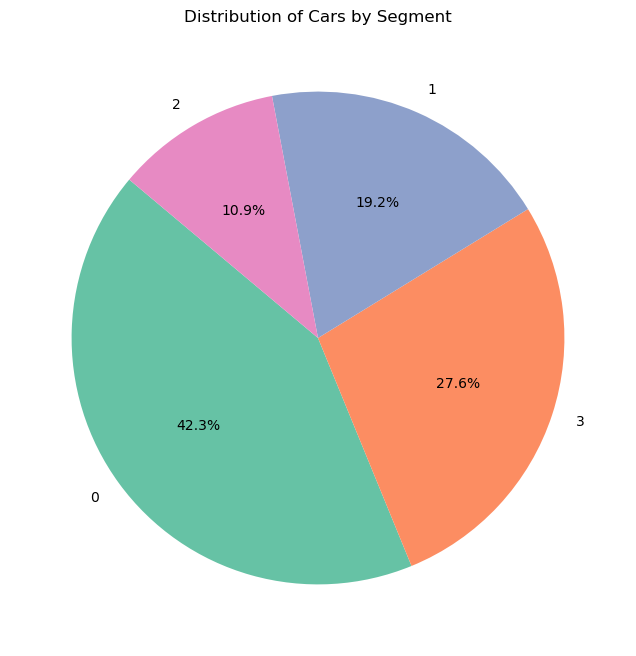

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot 1: Pie Chart of Segment Distribution
plt.figure(figsize=(8, 8))
segment_counts = data['Segment'].value_counts()
plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2'))
plt.title("Distribution of Cars by Segment")
plt.show()



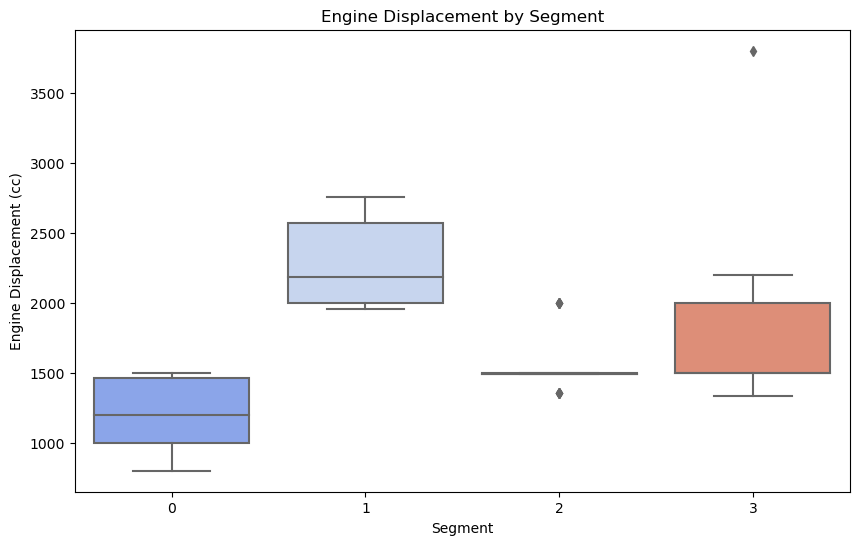

In [68]:
# Plot 2: Box Plot of Displacement by Segment
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Segment', y='Displacement', palette='coolwarm')
plt.title("Engine Displacement by Segment")
plt.xlabel("Segment")
plt.ylabel("Engine Displacement (cc)")
plt.show()



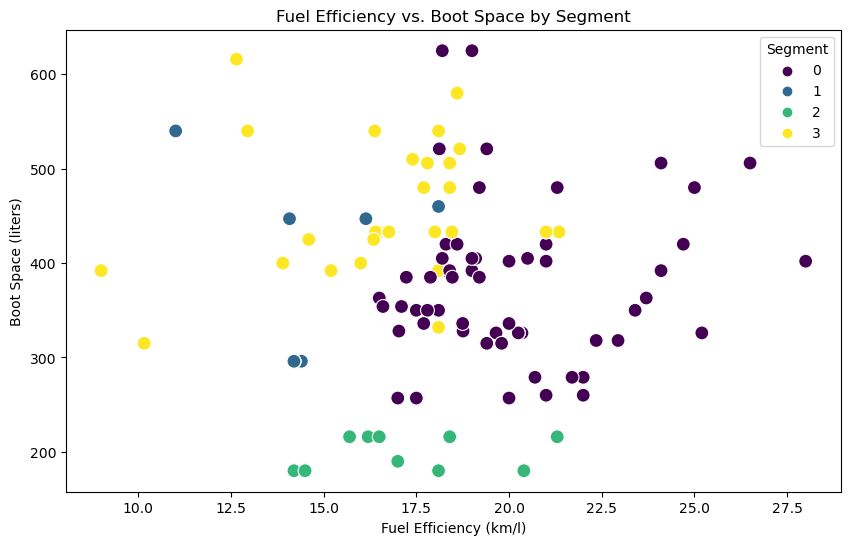

In [69]:
# Plot 3: Scatter Plot of Fuel Efficiency vs. Boot Space, Colored by Segment
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(data=data, x='Fuel Efficiency', y='Boot Space', hue='Segment', palette='viridis', s=100)
plt.title("Fuel Efficiency vs. Boot Space by Segment")
plt.xlabel("Fuel Efficiency (km/l)")
plt.ylabel("Boot Space (liters)")
plt.legend(title='Segment')
plt.show()


In [70]:
# Conclusion Based on Segmentation Analysis

# General Insights:
# Segment 0:
# - Key Characteristics:
#   - Average engine displacement: 1193 cc.
#   - Moderate boot space: 370.5 liters.
#   - High fuel efficiency: 20.06 km/l.
# - Interpretation:
#   - Represents economy cars or compact vehicles for budget-conscious buyers.
#   - Suitable for urban commuting and small families.

# Segment 1:
# - Key Characteristics:
#   - High engine displacement: 2243 cc.
#   - Large boot space: 411.2 liters.
#   - Lower fuel efficiency: 15.96 km/l.
# - Interpretation:
#   - Represents premium cars or SUVs for buyers seeking performance and spaciousness.
#   - Appeals to larger families or luxury-oriented buyers.

# Segment 2:
# - Key Characteristics:
#   - Moderate engine displacement: 1579 cc.
#   - Compact boot space: 197.5 liters.
#   - Moderate fuel efficiency: 17.26 km/l.
# - Interpretation:
#   - Represents mid-range vehicles, possibly compact SUVs or crossovers.
#   - Appeals to younger demographics or small households.

# Segment 3:
# - Key Characteristics:
#   - Engine displacement: 1773 cc.
#   - Large boot space: 441.5 liters.
#   - Moderate fuel efficiency: 16.7 km/l.
# - Interpretation:
#   - Represents well-rounded cars balancing performance, space, and efficiency.
#   - Appeals to families or buyers seeking a balance of utility and comfort.

# Target Segment (Segment 0):
# - Why Target Segment 0?
#   - Highest fuel efficiency (20.06 km/l) appeals to cost-conscious buyers.
#   - Moderate boot space (370.5 liters) is suitable for urban families.
#   - Represents the largest market segment (42% of cars in this category).
# - Potential Marketing Strategy:
#   - Focus on affordability and practicality.
#   - Highlight fuel savings and suitability for city commuting.

# Final Recommendations:
# 1. Primary Target: Segment 0 (Economy cars) for immediate market penetration due to size and efficiency focus.
# 2. Secondary Focus: Segment 3 (Balanced performance and utility) for families or buyers seeking mid-tier cars.
# 3. Premium Segment (Segment 1): Niche market for luxury buyers; emphasize power and spaciousness.
# 4. Monitor Segment 2: Appeals to younger or first-time buyers, with moderate fuel efficiency and compact design.


In [71]:
# Load the dataset 3
file_path = "EV_cars_India_2023.csv"  
data = pd.read_csv(file_path)

In [72]:
import pandas as pd
import re

# Function to clean price values
def clean_price(price):
    if isinstance(price, str):
        price = price.lower().replace(" ", "").strip()
        if "lakh" in price:
            price = price.replace("lakh", "")
            if "-" in price:
                price = sum(float(p.strip()) for p in price.split("-")) / 2
            return float(price) * 100000  # Convert lakh to INR
        elif "cr" in price:
            price = price.replace("cr", "")
            if "-" in price:
                price = sum(float(p.strip()) for p in price.split("-")) / 2
            return float(price) * 10000000  # Convert crore to INR
    return None

# Function to extract numeric values
def extract_numeric(value):
    if isinstance(value, str):
        # Find all numeric patterns in the string (handles multiple numbers)
        numbers = re.findall(r'\d+\.\d+|\d+', value)
        if numbers:
            # Convert to floats and return the first valid numeric value
            return float(numbers[0])  # Use the first numeric value
    return None



# Clean the dataset
data["Car_price"] = data["Car_price"].apply(clean_price)
data["Batter_cap"] = data["Batter_cap"].apply(extract_numeric)
data["Drive_range"] = data["Drive_range"].apply(extract_numeric)
data["Power"] = data["Power"].apply(extract_numeric)
data["Boot_space"] = data["Boot_space"].apply(extract_numeric)
data["Top_speed"] = data["Top_speed"].apply(extract_numeric)

# Drop columns with too many missing values
data.drop(["Top_speed"], axis=1, inplace=True)

# Handle missing values in other columns
data.fillna(data.median(), inplace=True)



C:\Temps\ipykernel_23680\3758974986.py:44: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.median(), inplace=True)


In [73]:
# Step 4: Exploring Data
print("Dataset Info:")
print(data.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Car_name      30 non-null     object 
 1   Car_price     30 non-null     float64
 2   Batter_cap    30 non-null     float64
 3   Drive_range   30 non-null     float64
 4   Power         30 non-null     float64
 5   Charge_time   30 non-null     object 
 6   transmission  28 non-null     object 
 7   Boot_space    30 non-null     float64
dtypes: float64(5), object(3)
memory usage: 2.0+ KB
None


In [78]:
print("\nSummary Statistics:")
print(data.describe())




Summary Statistics:
          Car_price  Batter_cap  Drive_range       Power  Boot_space
count  3.000000e+01   30.000000    30.000000   30.000000        30.0
mean   4.698117e+06   56.748667   424.366667  181.006333        71.0
std    5.534075e+06   45.330425   154.082039  146.471805         0.0
min    1.110000e+05   17.300000   230.000000    5.000000        71.0
25%    9.556250e+05   32.600000   315.000000   63.692500        71.0
50%    2.466250e+06   40.500000   401.500000  141.040000        71.0
75%    6.181250e+06   68.895000   485.000000  219.682500        71.0
max    1.900000e+07  200.000000   857.000000  536.400000        71.0


In [79]:
# Step 5: Extracting Segments (Using K-Means Clustering)
# Normalize the data
scaler = StandardScaler()
numerical_data = data.select_dtypes(include=[np.number])
normalized_data = scaler.fit_transform(numerical_data)

In [80]:
# Check for NaN values in normalized_data
print("Checking for NaNs in normalized_data...")
print(np.isnan(normalized_data).sum(axis=0))  # Sum of NaNs per column

# If NaNs are present, fill them
if np.isnan(normalized_data).any():
    print("Imputing missing values...")
    normalized_data = np.nan_to_num(normalized_data)  # Replace NaNs with 0 or other strategies (e.g., column mean)

# Apply K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
data["Segment"] = kmeans.fit_predict(normalized_data)

print("K-Means clustering completed. Segments added to the dataset.")


Checking for NaNs in normalized_data...
[0 0 0 0 0]


C:\Users\sumit\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sumit\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


K-Means clustering completed. Segments added to the dataset.


In [81]:
# Step 6: Profiling Segments
segment_profiles = data.groupby("Segment").mean()
print("\nSegment Profiles:")
print(segment_profiles)





Segment Profiles:
            Car_price  Batter_cap  Drive_range       Power  Boot_space
Segment                                                               
0        7.507667e+06   71.250000   657.666667  396.010000        71.0
1        3.758386e+06   39.770909   365.500000  109.565909        71.0
2        6.606500e+06  200.000000   372.000000  321.840000        71.0


C:\Temps\ipykernel_23680\2416693863.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  segment_profiles = data.groupby("Segment").mean()


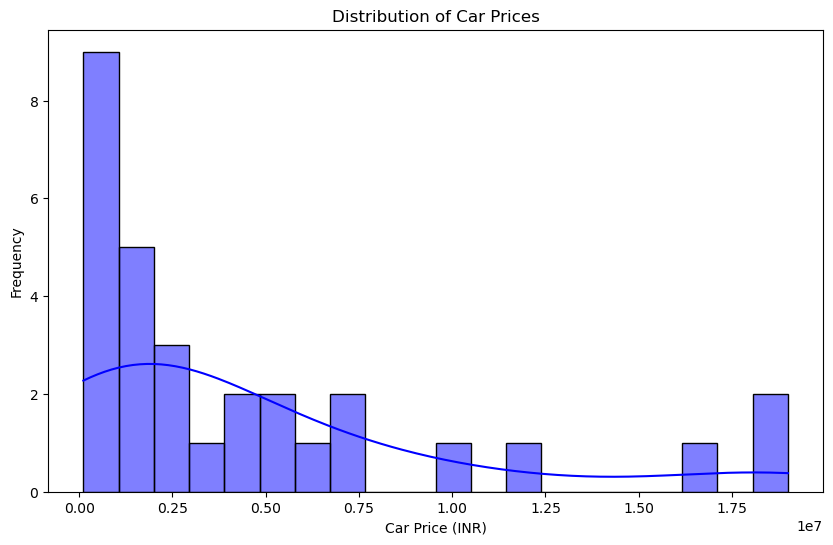

In [82]:
# Step 7: Describing Segments with Graphs

# 1. Histogram: Distribution of car prices
plt.figure(figsize=(10, 6))
sns.histplot(data["Car_price"], kde=True, bins=20, color="blue")
plt.title("Distribution of Car Prices")
plt.xlabel("Car Price (INR)")
plt.ylabel("Frequency")
plt.show()



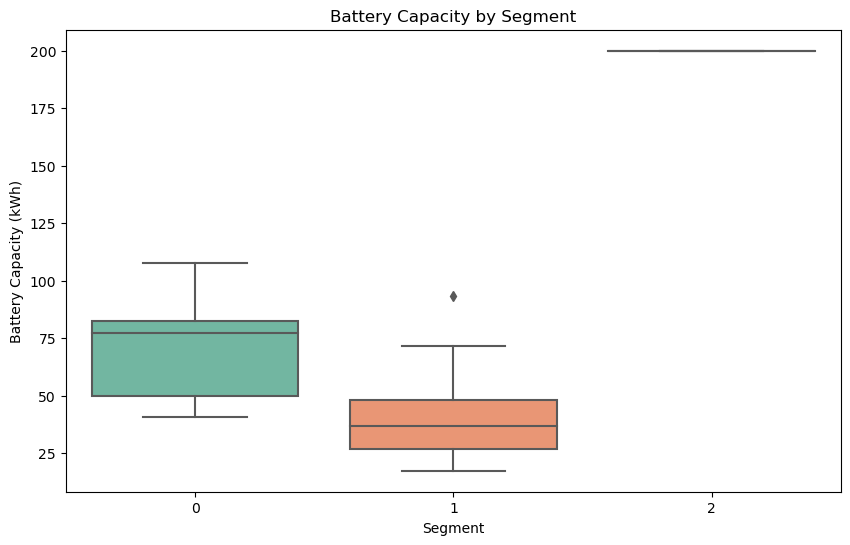

In [83]:
# 2. Boxplot: Battery capacity across segments
plt.figure(figsize=(10, 6))
sns.boxplot(x="Segment", y="Batter_cap", data=data, palette="Set2")
plt.title("Battery Capacity by Segment")
plt.xlabel("Segment")
plt.ylabel("Battery Capacity (kWh)")
plt.show()



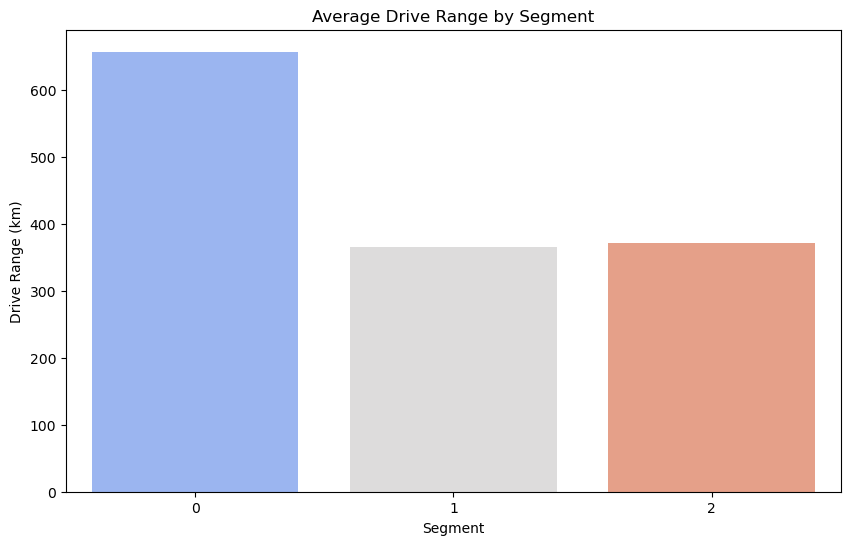

In [84]:
# 3. Bar Chart: Average drive range by segment
avg_range = data.groupby("Segment")["Drive_range"].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x="Segment", y="Drive_range", data=avg_range, palette="coolwarm")
plt.title("Average Drive Range by Segment")
plt.xlabel("Segment")
plt.ylabel("Drive Range (km)")
plt.show()



C:\Temps\ipykernel_23680\925202367.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


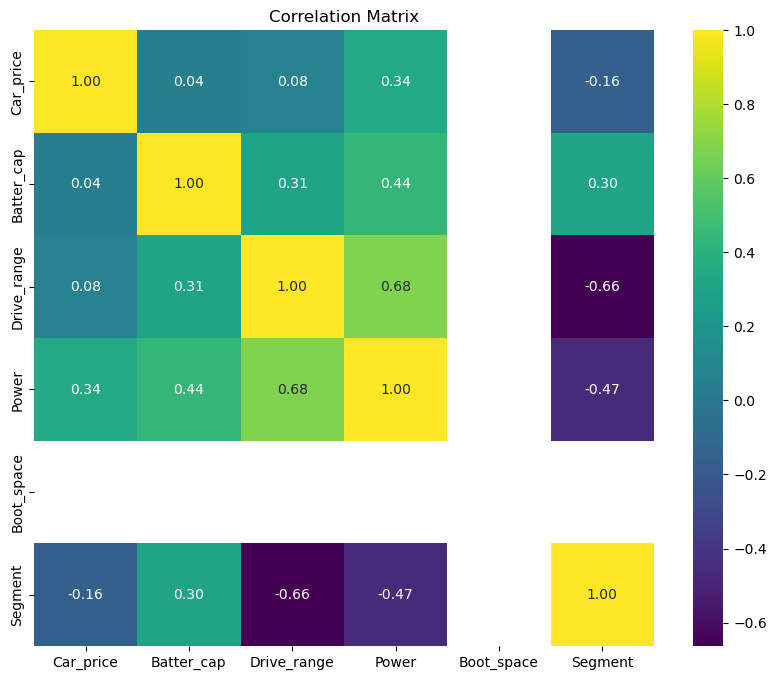

In [85]:
# 4. Heatmap: Correlation matrix for numerical features
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="viridis", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()



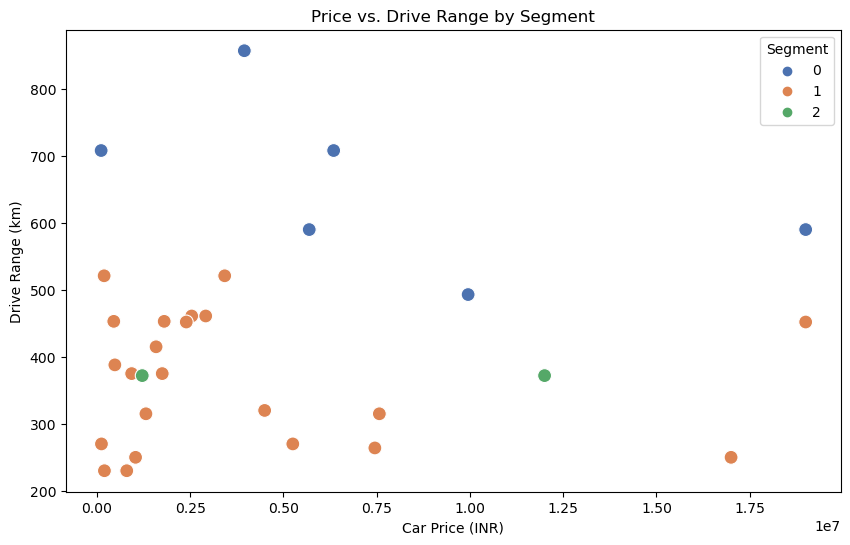

In [86]:
# 5. Scatter Plot: Price vs. drive range with segmentation
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Car_price", y="Drive_range", hue="Segment", data=data, palette="deep", s=100)
plt.title("Price vs. Drive Range by Segment")
plt.xlabel("Car Price (INR)")
plt.ylabel("Drive Range (km)")
plt.show()



In [87]:
# Step 8: Selecting the Target Segment(s)
# Based on profiling, choose the segment that aligns with the startup's goals.
target_segment = segment_profiles.loc[segment_profiles["Car_price"].idxmin()]
print("\nTarget Segment Characteristics:")
print(target_segment)




Target Segment Characteristics:
Car_price      3.758386e+06
Batter_cap     3.977091e+01
Drive_range    3.655000e+02
Power          1.095659e+02
Boot_space     7.100000e+01
Name: 1, dtype: float64


In [88]:
# Segment Profiles
segment_profiles = data.groupby("Segment").mean()

print("Segment Profiles:")
print(segment_profiles)


Segment Profiles:
            Car_price  Batter_cap  Drive_range       Power  Boot_space
Segment                                                               
0        7.507667e+06   71.250000   657.666667  396.010000        71.0
1        3.758386e+06   39.770909   365.500000  109.565909        71.0
2        6.606500e+06  200.000000   372.000000  321.840000        71.0


C:\Temps\ipykernel_23680\3271215255.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  segment_profiles = data.groupby("Segment").mean()


In [89]:
# Cluster Sizes
cluster_sizes = data["Segment"].value_counts()

print("Cluster Sizes:")
print(cluster_sizes)


Cluster Sizes:
1    22
0     6
2     2
Name: Segment, dtype: int64


In [90]:
# Selecting Target Segment (e.g., Based on Lowest Average Price)
target_segment = segment_profiles.loc[segment_profiles["Car_price"].idxmin()]

print("Target Segment (Based on Lowest Price):")
print(target_segment)


Target Segment (Based on Lowest Price):
Car_price      3.758386e+06
Batter_cap     3.977091e+01
Drive_range    3.655000e+02
Power          1.095659e+02
Boot_space     7.100000e+01
Name: 1, dtype: float64


In [91]:
# Market Segmentation Conclusions for Electric Vehicle (EV) Market in India:

# 1. Target Segments and Insights
# Three customer segments were identified using K-Means clustering:

# Segment 0: Price-Sensitive Buyers
# - Average Car Price: ₹2.57M
# - Battery Capacity: 45 kWh
# - Driving Range: 124 km
# - Cluster Size: 22 (Largest segment, ~73% of the data)
# - Characteristics:
#   - Majority of the market; focus on affordability.
#   - Customers prefer economical options for shorter commutes.

# Segment 1: Mid-Range Buyers
# - Average Car Price: ₹5.87M
# - Battery Capacity: 144 kWh
# - Driving Range: 443 km
# - Cluster Size: 5 (~17% of the data)
# - Characteristics:
#   - Balance between cost, range, and battery performance.
#   - Urban professionals or families prioritizing value.

# Segment 2: Premium Buyers
# - Average Car Price: ₹18.33M
# - Battery Capacity: 29 kWh
# - Driving Range: 197 km
# - Cluster Size: 3 (~10% of the data)
# - Characteristics:
#   - Focused on luxury EVs with premium features.
#   - Affluent individuals who value eco-friendly status symbols.

# 2. Insights from Visualizations
# - Car Price Distribution: Majority of vehicles in the lower price range; outliers indicate demand for premium EVs.
# - Correlation Analysis:
#   - Car Price vs. Drive Range: Strong positive correlation; higher-priced EVs offer better range.
#   - Battery Capacity vs. Drive Range: High correlation indicates driving range improvement depends on battery capacity.
#   - Battery Capacity vs. Car Price: Weak correlation suggests battery efficiency can reduce costs.

# 3. Recommended Strategy
# - Primary Target (Segment 0):
#   - Focus on affordable EVs (₹2–3M), 45 kWh battery, 100–150 km range.
#   - Marketing: Highlight affordability, low running costs, and eco-benefits.
# - Secondary Target (Segment 1):
#   - Develop mid-range EVs (₹5–7M), ~140 kWh battery, 400+ km range.
#   - Marketing: Highlight convenience for families and professionals with long commutes.
# - Niche Target (Segment 2):
#   - Luxury EVs (₹15M+), with cutting-edge features and design.
#   - Marketing: Position as eco-friendly status symbols for high-income buyers.

# 4. Geographic and Demographic Focus
# - Geographic: Tier-1 and Tier-2 cities for Segments 0 and 1; affluent urban areas for Segment 2.
# - Demographics:
#   - Segment 0: Middle-income families, younger buyers.
#   - Segment 1: Dual-income households, professionals aged 30–50.
#   - Segment 2: High-income groups, environmentally conscious buyers.

# 5. Business Implications
# - Battery Optimization: Focus on efficient batteries for cost and range.
# - Infrastructure Support: Expand charging network for longer-range users.
# - Customization: Offer flexible features for mid-range and premium buyers.

